# House Price Forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Updating width of Jupyter notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_colwidth', 2000)
pd.options.display.max_seq_items = 2000
pd.options.display.max_rows = 4000

In [2]:
## Reading the data file and taking checking first five entries.

house_price_data = pd.read_csv('dataset.csv')
house_price_data.head()

,Address,AreaName,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,"86 Waterford Dr Toronto, ON",Richview,3,1.00,1180,5650,1.0,"$221,900.00"
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,3,2.25,2570,7242,2.0,"$538,000.00"
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,2,1.00,770,10000,1.0,"$180,000.00"
3,"102 NEIL Avenue Hamilton, ON",Greenford,4,3.00,1960,5000,1.0,"$604,000.00"
4,"#1409 - 230 King St Toronto, ON",Downtown,3,2.00,1680,8080,1.0,"$510,000.00"


In [3]:
house_price_data.info()

# Outcome: Almost 85% of data don't have address or area name which is significant. 

# Outcome of descriptive statistics will play a huge role in determing how we will be using this data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Address      2960 non-null   object 
 1   AreaName     2944 non-null   object 
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   sqft_living  21613 non-null  int64  
 5   sqft_lot     21613 non-null  int64  
 6   floors       21613 non-null  float64
 7    price       21613 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 1.3+ MB


In [4]:
house_price_data.columns = house_price_data.columns.str.strip()

In [5]:
# Remove the '$' and ',' characters from the 'price' column
house_price_data['price'] = house_price_data['price'].str.replace('$', '')
house_price_data['price'] = house_price_data['price'].str.replace(',', '')

# Converting price columns to float
house_price_data['price'] = house_price_data['price'].astype(float)

In [6]:
house_price_data[house_price_data.duplicated()]

## Outcome: 9 duplicate entry found.

,Address,AreaName,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
3951,NaN,NaN,4,1.75,2410,8447,2.0,550000.0
14983,NaN,NaN,3,2.50,2290,5089,2.0,585000.0
17242,NaN,NaN,3,2.50,1680,1683,2.0,629950.0
17842,NaN,NaN,3,1.00,1010,6120,1.0,550000.0
20054,NaN,NaN,3,2.50,1940,3211,2.0,555000.0
20524,NaN,NaN,3,2.25,1410,905,3.0,529500.0
21225,NaN,NaN,3,3.00,2230,1407,2.5,635000.0
21474,NaN,NaN,5,2.50,2170,2752,2.0,359800.0
21534,NaN,NaN,3,1.75,1650,1180,3.0,599000.0


In [7]:
house_price_data = house_price_data.drop_duplicates()


In [8]:
house_price_data.shape

(21604, 8)

In [9]:
house_price_data.head(3)

,Address,AreaName,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,"86 Waterford Dr Toronto, ON",Richview,3,1.00,1180,5650,1.0,221900.0
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,3,2.25,2570,7242,2.0,538000.0
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,2,1.00,770,10000,1.0,180000.0


In [10]:
house_price_data.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
count,21604.000000,21604.000000,21604.000000,2.160400e+04,21604.000000,2.160400e+04
mean,3.370857,2.114724,2079.989030,1.511184e+04,1.494029,5.400820e+05
std,0.930156,0.770236,918.578231,4.142842e+04,0.539798,3.672002e+05
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,7.500000e+04
25%,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,3.215000e+05
50%,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.069525e+04,2.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,7.700000e+06


In [11]:

house_price_data[house_price_data['AreaName'].isnull()].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
count,18660.000000,18660.000000,18660.000000,1.866000e+04,18660.000000,1.866000e+04
mean,3.367363,2.120431,2080.627278,1.513327e+04,1.502867,5.412381e+05
std,0.935474,0.771330,918.709475,4.138657e+04,0.543962,3.653998e+05
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,7.800000e+04
25%,3.000000,1.750000,1420.000000,5.000000e+03,1.000000,3.242700e+05
50%,3.000000,2.250000,1910.000000,7.560000e+03,1.500000,4.500000e+05
75%,4.000000,2.500000,2555.500000,1.058325e+04,2.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.164794e+06,3.500000,7.700000e+06


In [12]:
house_price_data[house_price_data['AreaName'].notnull()].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
count,2944.000000,2944.000000,2944.000000,2.944000e+03,2944.000000,2.944000e+03
mean,3.393003,2.078550,2075.943614,1.497596e+04,1.438010,5.327546e+05
std,0.895546,0.762404,917.891558,4.169953e+04,0.509154,3.783939e+05
min,0.000000,0.000000,380.000000,6.490000e+02,1.000000,7.500000e+04
25%,3.000000,1.500000,1430.000000,5.501500e+03,1.000000,3.150000e+05
50%,3.000000,2.000000,1910.000000,8.038000e+03,1.000000,4.435000e+05
75%,4.000000,2.500000,2500.000000,1.125100e+04,2.000000,6.365000e+05
max,8.000000,6.000000,8010.000000,1.651359e+06,3.500000,5.350000e+06


**Outcome:** From the descriptive statistics there doesn't seems to much difference in data features.

Thus, might exclude using AreaName feature in future.

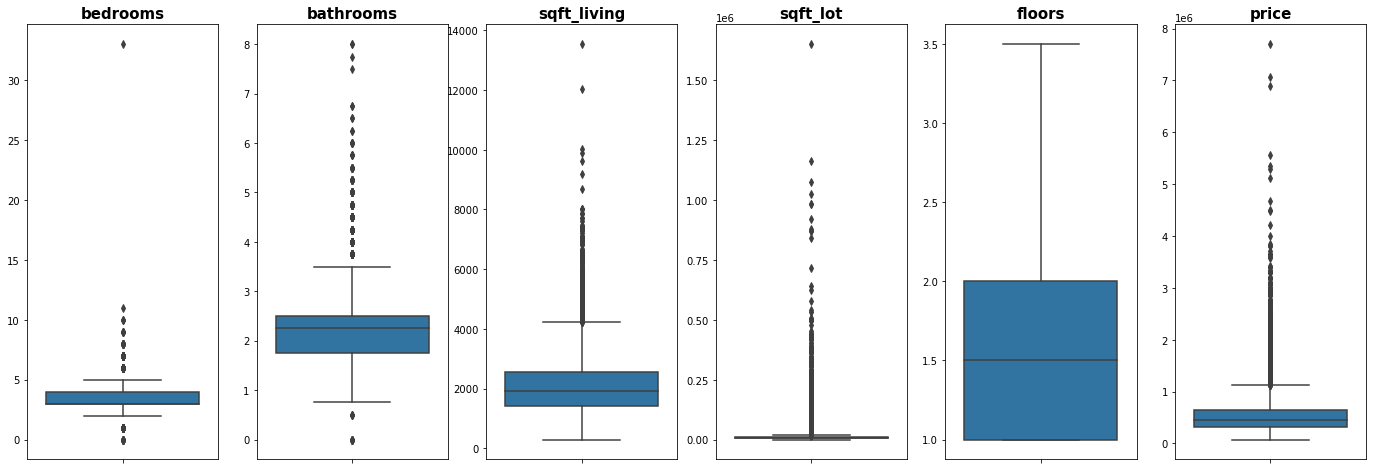

In [13]:
numeric_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'price']

fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(24,8))

for i, column in enumerate(numeric_columns):
    axes[i].set_title(column, fontweight="bold", fontsize=15)
    sns.boxplot(ax=axes[i], y=column, data=house_price_data, orient='v')  
    axes[i].set_ylabel("")
    
# Outcome: Most houses has 3-5 bedrooms, 2-3 bathrooms, atleast 1500 sqft of living space and price of such house usually range between 400,000 to 700,000.
# We can say houses above the price of 1 Million are expensive one.

## Outlier Handling

In [14]:
## Outlier Conditions inferred from above box plot: Bedroom > 6 or bathroom > 5 or sqft_living > 7000

house_price_data[(house_price_data['bedrooms'] > 6) | (house_price_data['bathrooms'] > 5) | (house_price_data['sqft_living'] > 7000)]

## 107 Outliers as per above conditions


,Address,AreaName,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
556,"11 3 Sims Estate Place Kitchener, ON",Centreville Chicopee,7,3.50,4640,15235,2.0,1950000.0
1135,"680193 CHATSWORTH ROAD 24 Holland Centre, ON",Holland Centre,7,3.00,2940,8624,1.0,420000.0
1164,"#1730 - 3888 DUKE OF YORK BLVD Mississauga, ON",Mississauga,5,5.25,8010,45517,2.0,5110800.0
1241,"332 Yonge St Kingston, ON",Kingston,7,3.00,2800,9569,1.0,350000.0
1315,"7689 HAWTHORNE DR|Unit - Windsor, ON",Forest Glade,6,6.00,7390,24829,2.0,5300000.0
1448,"#914 - 20 Bloorview Pl Toronto, ON",Don Valley Village,5,5.00,8000,23985,2.0,5350000.0
1660,"#209B - 80 Nashdene Rd Toronto, ON",Armdale,8,5.00,2800,2580,2.0,490000.0
2626,"70 Poynter Dr Toronto, ON",Richview,5,5.50,6640,40014,2.0,4500000.0
2713,"618 Tourelle Drive Orleans, ON",Orléans,5,3.50,7350,12231,2.0,1110000.0
3020,NaN,NaN,4,5.50,6930,45100,1.0,2525000.0


In [15]:
house_price_data = house_price_data[(house_price_data['bedrooms'] <= 6) & (house_price_data['bathrooms'] <= 5) & (house_price_data['sqft_living'] <= 7000)]
house_price_data.reset_index(drop=True, inplace=True)


In [16]:
house_price_data.shape

(21497, 8)

In [17]:
# # z-scores for 'bedrooms', 'bathrooms', and 'sqft_living'
# z_scores = (house_price_data[['bedrooms', 'bathrooms', 'sqft_living']] - house_price_data[['bedrooms', 'bathrooms', 'sqft_living']].mean()) / house_price_data[['bedrooms', 'bathrooms', 'sqft_living']].std()

# # Find the outlier entries
# outliers = house_price_data[(z_scores.abs() > 3).any(axis=1)]

# outliers

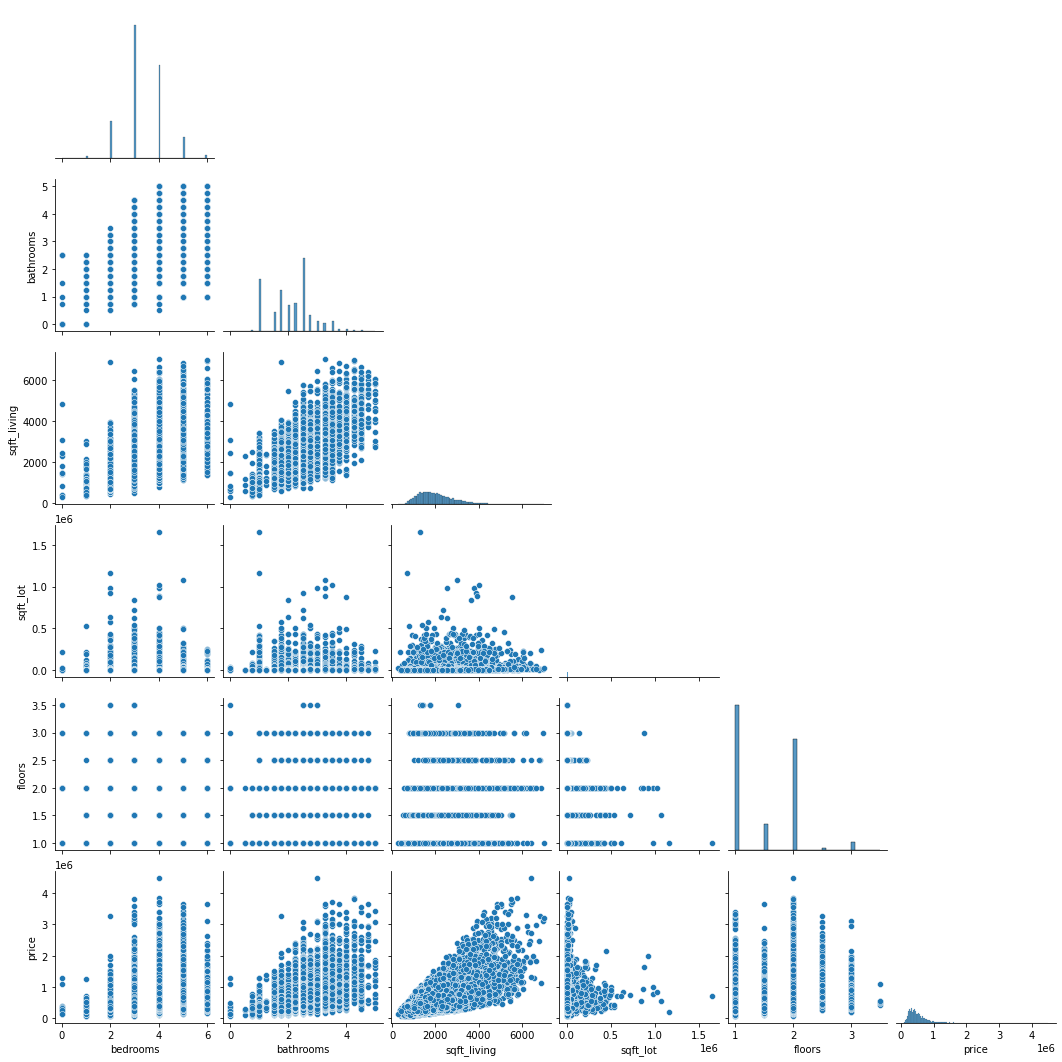

In [18]:
sns.pairplot(house_price_data, corner=True)

In [19]:
# Fetching top 15 areas on the basis of number of properties listed.

area_counts = house_price_data.groupby('AreaName')['Address'].count()

sorted_areas = area_counts.sort_values(ascending=False)
sorted_areas.head(15)

# Outcomes: Most properties are listed in "Downtown" area of GTA.

AreaName
Downtown           286
Willowdale         105
Midtown Toronto     98
Mississauga         72
Mimico              57
Niagara             51
Huntsville          48
Waterloo            44
Rexdale             43
Richmond Hill       40
Newtonbrook         38
Oakville            36
Malvern             34
Orléans             33
Niagara Falls       33
Name: Address, dtype: int64

In [20]:
house_price_data.groupby('AreaName')['price'].agg(**{'Highest Price Noted': 'max', 'Minimum Price Noted': 'min'}).sort_values(by='Highest Price Noted', ascending=False)

,Highest Price Noted,Minimum Price Noted
AreaName,,
Bathurst Manor,3850000.0,280000.0
Paisley,3600000.0,441500.0
Maple Leaf,3278000.0,226000.0
Leslieville,3075000.0,200000.0
Richview,3070000.0,189000.0
Huntsville,3000000.0,123300.0
Liberty Village,2900000.0,201000.0
Niagara,2750000.0,152900.0
Eglinton East,2532000.0,166000.0


**Assumption/ Thoughts:** Properties with area name hardly contribute 15% of the data but we can assume this as a sample drawn out of the entire dataset to make some inference on this data in terms of area. 

**Top 5 expensive area**
- Bathurst Manor	
- Paisley	
- Maple Leaf	
- Leslieville
- Richview	

<AxesSubplot:>

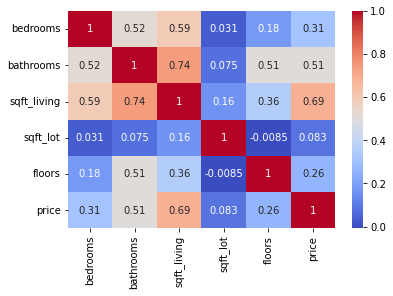

In [21]:
corr_matrix = house_price_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

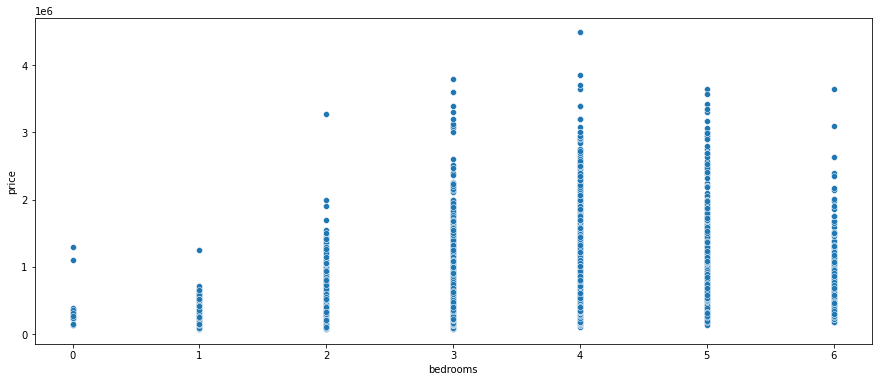

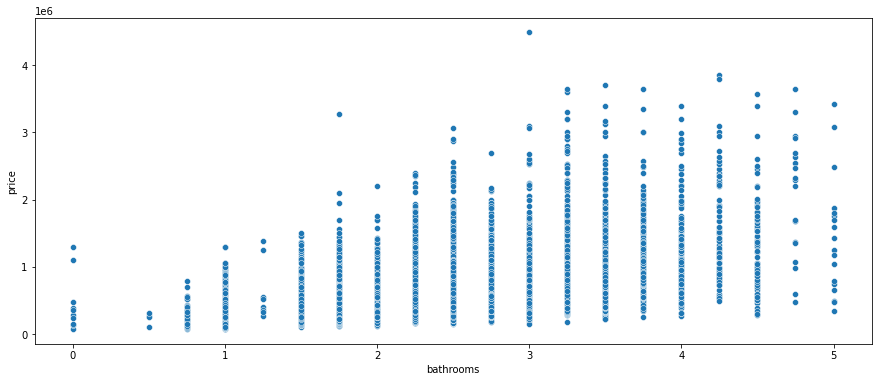

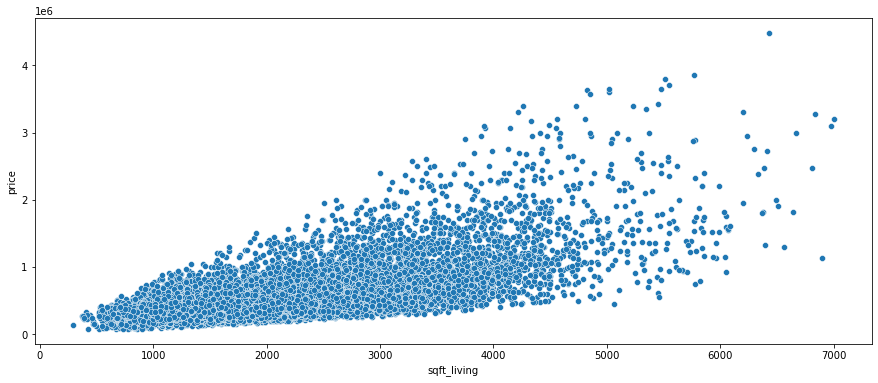

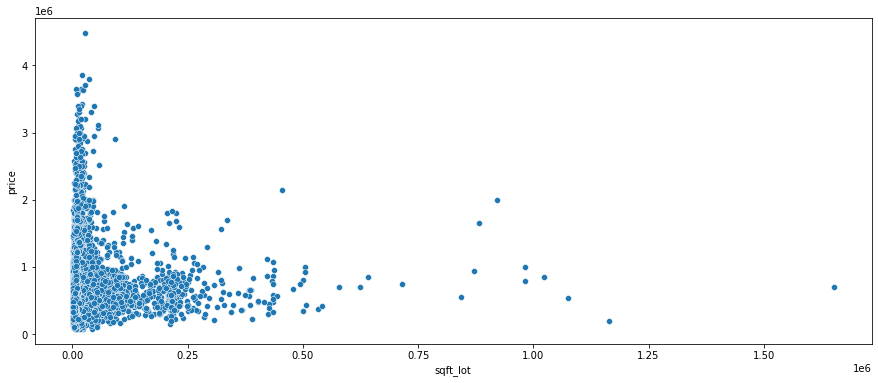

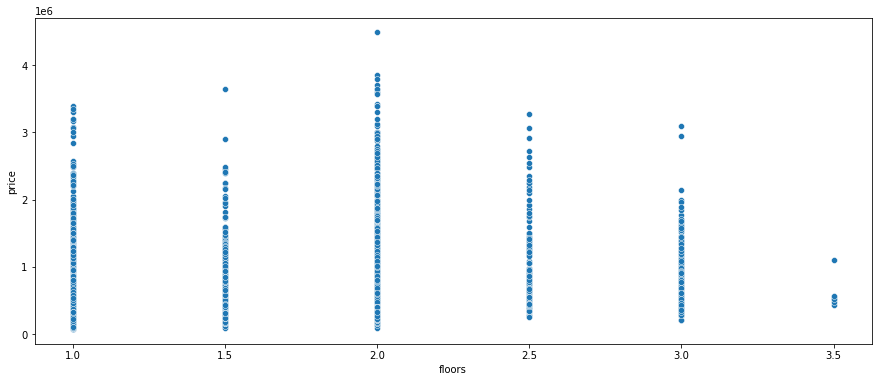

In [22]:
for col in house_price_data.select_dtypes(include=['float64', 'int64']).columns[:-1]:
    plt.figure(figsize=(15,6))
    sns.scatterplot(x=col, y='price', data=house_price_data)
    plt.show()

**Outcome:**

    - Price of studio apartments in GTA area is below half a million dollars.
    - With 1 Million dollars, one can get upto 4000 sqft of living space.
    - As the number of bedroom and bathroom increases, price of the property increases (which is quite obvious).
    
    

## Feature Engineering

In [23]:
## New Feature: total_area
house_price_data['total_area'] = house_price_data['sqft_living'] + house_price_data['sqft_lot']

## New Feature: price_per_sqft
house_price_data['price_per_sqft'] = house_price_data['price'] / house_price_data['total_area']

house_price_data.head(5)


,Address,AreaName,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price,total_area,price_per_sqft
0,"86 Waterford Dr Toronto, ON",Richview,3,1.00,1180,5650,1.0,221900.0,6830,32.489019
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,3,2.25,2570,7242,2.0,538000.0,9812,54.830819
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,2,1.00,770,10000,1.0,180000.0,10770,16.713092
3,"102 NEIL Avenue Hamilton, ON",Greenford,4,3.00,1960,5000,1.0,604000.0,6960,86.781609
4,"#1409 - 230 King St Toronto, ON",Downtown,3,2.00,1680,8080,1.0,510000.0,9760,52.254098


In [24]:
# binning based on the number of 'bedrooms' 
bins = [0, 2, 4, 6]

labels = ['1-2', '3-4', '5-6']
#labels = [1, 3, 5]
house_price_data['bedroom_bins'] = pd.cut(house_price_data['bedrooms'], bins=bins, labels=labels, include_lowest=True)
house_price_data.head(2)

,Address,AreaName,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price,total_area,price_per_sqft,bedroom_bins
0,"86 Waterford Dr Toronto, ON",Richview,3,1.00,1180,5650,1.0,221900.0,6830,32.489019,3-4
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,3,2.25,2570,7242,2.0,538000.0,9812,54.830819,3-4


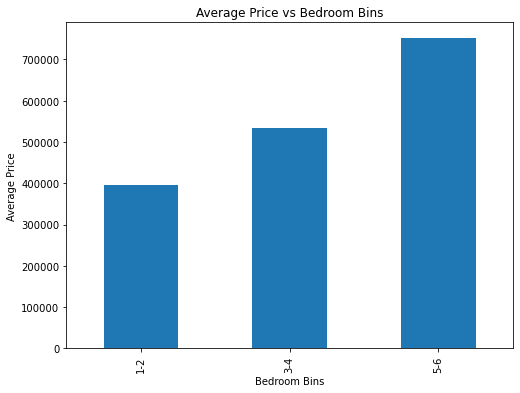

In [25]:
## average price as per bedroom_bin groups
bedroom_grouped = house_price_data.groupby('bedroom_bins')['price'].mean()

bedroom_grouped.plot(kind='bar', figsize=(8,6))
plt.xticks(rotation=90)
plt.xlabel('Bedroom Bins')
plt.ylabel('Average Price')
plt.title('Average Price vs Bedroom Bins')
plt.show()


In [26]:
## As we understood above, address and area doesn't make much difference in the price of the house as most houses in GTA region follows almost similar price range.
house_price_data = house_price_data.drop(['Address', 'AreaName', 'bedroom_bins'], axis=1)
house_price_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price,total_area,price_per_sqft
0,3,1.00,1180,5650,1.0,221900.0,6830,32.489019
1,3,2.25,2570,7242,2.0,538000.0,9812,54.830819
2,2,1.00,770,10000,1.0,180000.0,10770,16.713092
3,4,3.00,1960,5000,1.0,604000.0,6960,86.781609
4,3,2.00,1680,8080,1.0,510000.0,9760,52.254098
...,...,...,...,...,...,...,...,...
21492,3,2.50,1530,1131,3.0,360000.0,2661,135.287486
21493,4,2.50,2310,5813,2.0,400000.0,8123,49.242891
21494,2,0.75,1020,1350,2.0,402101.0,2370,169.662869
21495,3,2.50,1600,2388,2.0,400000.0,3988,100.300903


## Data Normalization

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

y = house_price_data['price']
X = house_price_data.drop(['price'], axis=1)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## train n test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=35)

## Modelling

In [28]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score, mean_squared_error


# # Trainiing a linear regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Model Evaluation
# y_pred = model.predict(X_test)
# r2 = r2_score(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f'R^2 score: {r2:.4f}')
# print('RMSE:', rmse)


In [29]:
# pip install xgboost

In [32]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

# Trainiing a XGBoost regression model
model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 100, seed = 42)


param_grid = {
    'n_estimators': [50, 100, 200, 300, 400]
}

# grid search using 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
# finding best value of n_estimators
print(f"Best value of n_estimators: {grid_search.best_params_['n_estimators']}")


model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=grid_search.best_params_['n_estimators'], seed = 42)
model.fit(X_train, y_train)


# Model Evaluation
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R^2 score: {r2:.4f}')
print(f'RMSE:, {rmse:3f}')


Best value of n_estimators: 400
R^2 score: 0.9872
RMSE:, 38594.881958


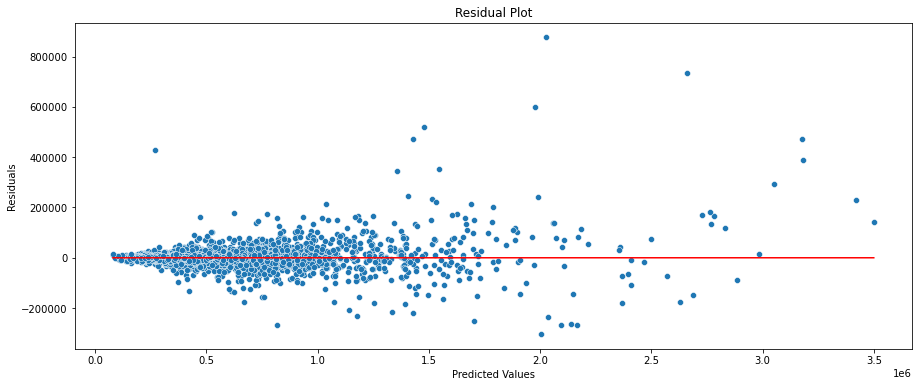

In [33]:
residuals = y_test - y_pred

# residual plot
plt.figure(figsize=(15,6))
sns.scatterplot(x=y_pred, y=residuals)
sns.lineplot(x=y_pred, y=0, color='red')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


**Outcome:**

    - Model is fits 98% of data.
    - With the residue plot, there is a error margin of upto $40,000 in predicting the house price in majority of the cases.
    - More information like area name, built year, crime rate might help to increase the performance of the model.